In [6]:
from gprMax.gprMax import api
import math

filename_g = 'treetrunk_2d'

def generate_point_on_circle(radius, x_center, y_center, angle_degrees):
    angle_radians = math.radians(angle_degrees)
    x = x_center + radius * math.cos(angle_radians)
    y = y_center + radius * math.sin(angle_radians)
    return x, y


In [2]:
# Configuration

b_scan_cnt = 90
buffer = 5

cx = 0.75
cy = 0.75 
cz = 0
cradius = 0.3
cavity_radius = 0.08
error = 0.002

# Generate point of cavity center
# radius = cradius - (cavity_radius + error)
radius = 0.13
x1,y1 = generate_point_on_circle(radius, cx, cy, angle_degrees=0) 
z1 = 0

In [37]:
import math

def generate_next_step_in_circular_path(x, y, z, cx, cy, cz, radius, num_steps = b_scan_cnt):

    # Calculate the current angle based on the current coordinates
    dx = x - cx
    dy = y - cy
    current_angle = math.atan2(dy, dx)

    # Calculate the angle increment per step
    angle_increment = 2 * math.pi / num_steps
    # angle_increment = -2 * math.pi / num_steps

    # Calculate the new angle for the next step
    new_angle = current_angle + angle_increment

    # Calculate the new coordinates using the new angle and radius
    x_new = cx + radius * math.cos(new_angle)
    y_new = cy + radius * math.sin(new_angle)
    z_new = z + cz  # Assuming no change in the z-coordinate
    
    return x_new, y_new, z_new

radius1 = math.sqrt((x1 - cx)**2 + (y1 - cy)**2 + (z1 - cz)**2)

##################### Generate points in circular view
cavity_coord = []
cavity_coord.append((x1,y1,z1))

for i in range(0,b_scan_cnt-1):
    x1_n, y1_n, z1_n = generate_next_step_in_circular_path(x1,y1,z1,cx,cy,cz,radius1,b_scan_cnt)
    cavity_coord.append((x1_n,y1_n,z1_n))
    x1 = x1_n
    y1 = y1_n
    z1 = z1_n


with open('cavity_coord.txt', 'w') as f:
    for k,v,i in cavity_coord:
       f.write("{} {} {}\n".format(k,v,i))


with open('cavity_coord_test.txt', 'w') as f:
   for k,v,i in cavity_coord:
       f.write("({}, {})\n".format(k,v))


In [22]:
%%writefile treetrunk_2d.in

#title: Defect TreeTrunk

Configuration
#domain: 0.6 0.6 0.001
#dx_dy_dz: 0.001 0.001 0.001
#time_window: 3e-08

#pml_cells: 10 10 0 10 10 0


Source - Receiver - Waveform
#waveform: ricker 1 1e9 my_wave
#python:
src_coord = []
rx_coord = []
with open('src_coord.txt', 'r') as file:
    for line in file:
        x, y, z = map(float,line.strip().split())
        src_coord.append((x, y, z))
file.close()
src_x, src_y, src_z = src_coord[current_model_run-1]

with open('rx_coord.txt', 'r') as file:
    for line in file:
        x, y, z = map(float,line.strip().split())
        rx_coord.append((x, y, z))
file.close()
rx_x, rx_y, rx_z = rx_coord[current_model_run-1]

print(f'#hertzian_dipole: z {src_x} {src_y} {src_z} my_wave')
print(f'#rx: {rx_x} {rx_y} {rx_z}')

#end_python:


In [8]:
from gprMax.receivers import Rx
%matplotlib inline
api(filename_g + '.in', n=1, geometry_only=False)



=== Electromagnetic modelling software based on the Finite-Difference Time-Domain (FDTD) method 

    www.gprmax.com   __  __
     __ _ _ __  _ __|  \/  | __ ___  __
    / _` | '_ \| '__| |\/| |/ _` \ \/ /
   | (_| | |_) | |  | |  | | (_| |>  <
    \__, | .__/|_|  |_|  |_|\__,_/_/\_\
    |___/|_|
                     v3.1.6 (Big Smoke)

 Copyright (C) 2015-2023: The University of Edinburgh
 Authors: Craig Warren and Antonis Giannopoulos

 gprMax is free software: you can redistribute it and/or modify it under the
  terms of the GNU General Public License as published by the Free Software
  Foundation, either version 3 of the License, or (at your option) any later
  version.
 gprMax is distributed in the hope that it will be useful, but WITHOUT ANY
  WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR
  A PARTICULAR PURPOSE.  See the GNU General Public License for more details.
 You should have received a copy of the GNU General Public License along with
  gpr

Running simulation, model 1/1: 100%|████| 12721/12721 [00:47<00:00, 265.80it/s]
Memory (RAM) used: ~214MB
Solving time [HH:MM:SS]: 0:00:47.859096

=== Simulation completed in [HH:MM:SS]: 0:00:48.154234 ========================

{"Rx": "type", "api": "function", "dset": "Dataset", "dt": "float64", "f": "File", "filename_g": "str", "generate_point_on_circle": "function", "get_output_data": "function", "h5py": "module", "math": "module", "merge_files": "function", "mpl_plot": "function", "np": "module", "outputdata": "ndarray", "plt": "module", "rxcomponent": "str", "rxnumber": "int"}
{"Rx": "type", "api": "function", "dset": "Dataset", "dt": "float64", "f": "File", "filename_g": "str", "generate_point_on_circle": "function", "get_output_data": "function", "h5py": "module", "math": "module", "merge_files": "function", "mpl_plot": "function", "np": "module", "outputdata": "ndarray", "plt": "module", "rxcomponent": "str", "rxnumber": "int"}
{"Rx": "type", "api": "function", "dset": "Dataset

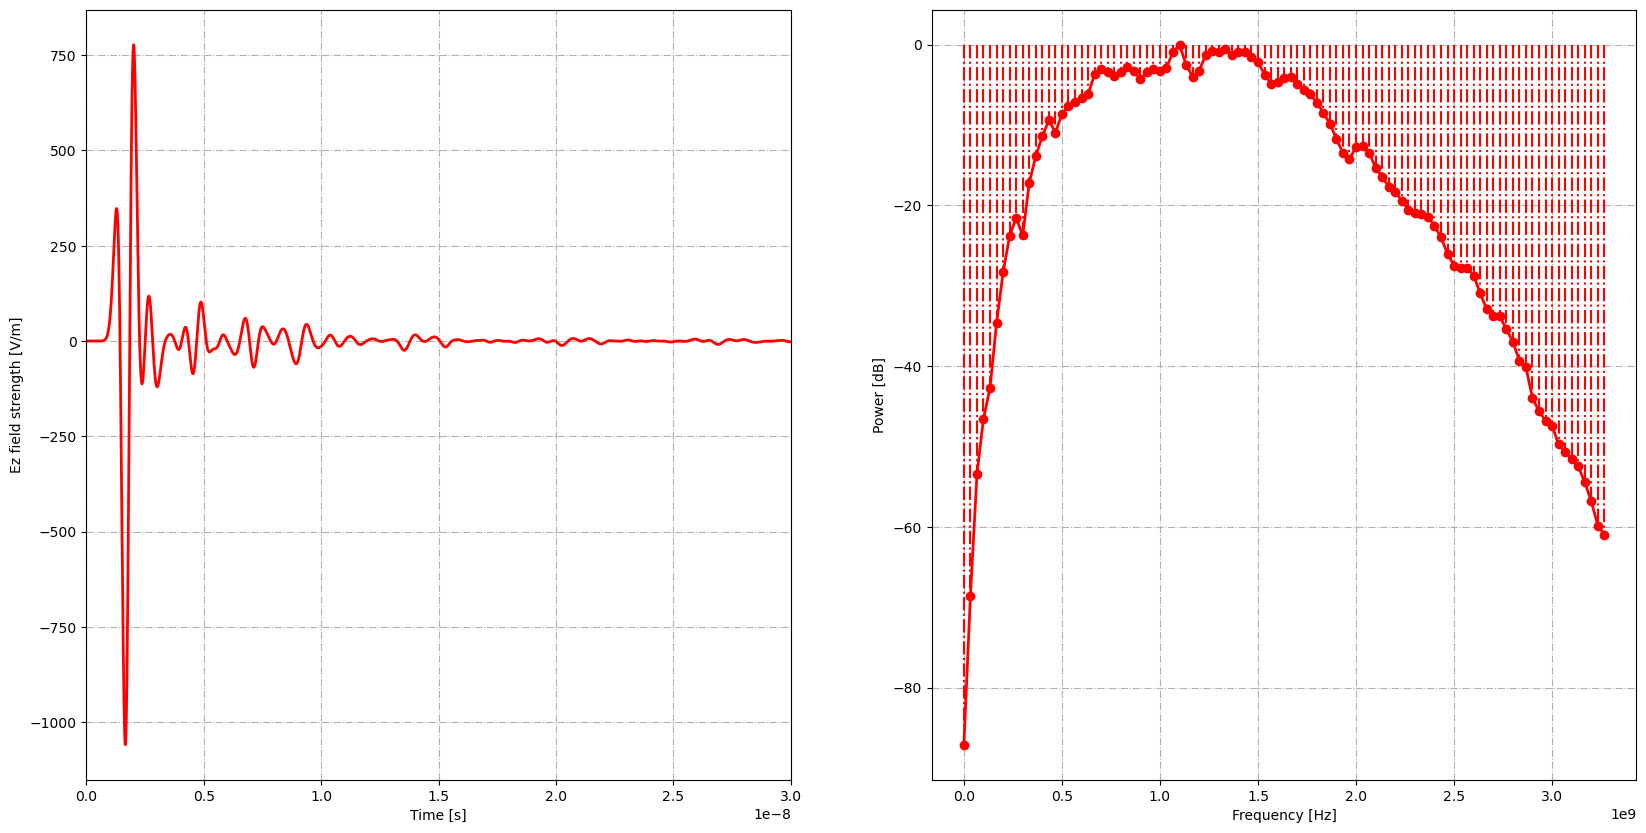

In [14]:
from gprMax.receivers import Rx
outputs = Rx.defaultoutputs
outputs = ['Ez']
from tools.plot_Ascan import mpl_plot
plt = mpl_plot('imgrot_test_012.out', outputs, fft=True)

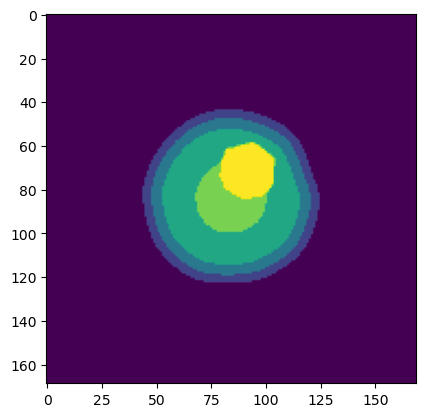

In [5]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

f = h5py.File('test_cavity.h5', 'r')
dset = f['data']

# Generate the image
plt.imshow(dset, cmap='viridis')

# Display the image
plt.show()

In [25]:
%matplotlib inline
from tools.plot_Ascan import mpl_plot
from gprMax.receivers import Rx

# api(filename_g + '.in', restart= 1 ,n=b_scan_cnt, geometry_only=False)

api(filename_g + '.in' ,n=36, geometry_only=False)

In [26]:
from tools.outputfiles_merge import merge_files

merge_files(str(filename_g.replace('./','').replace('.in','')), True)


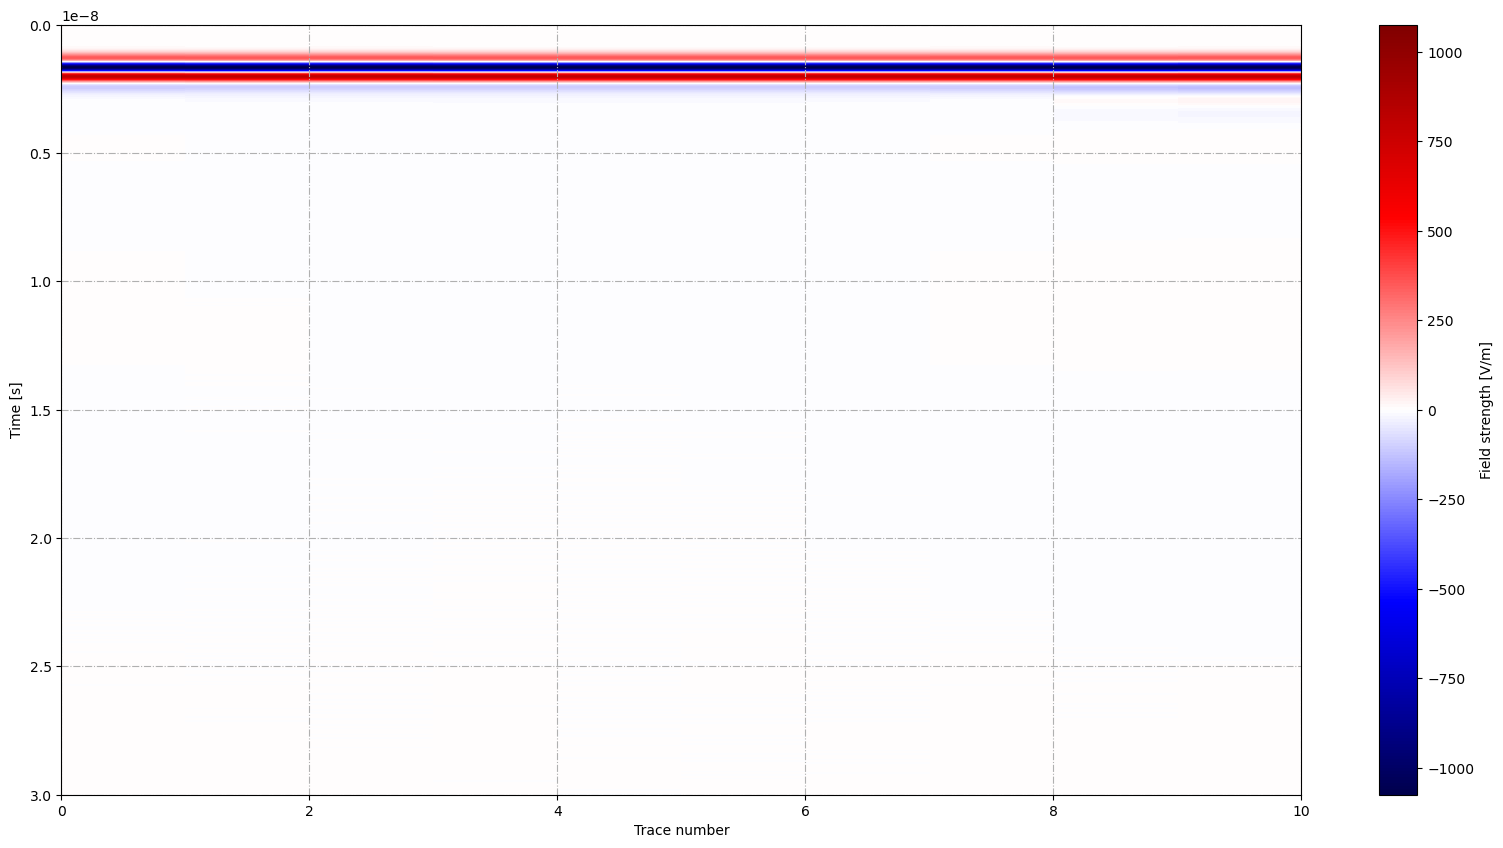

In [28]:
# from tools.outputfiles_merge import merge_files
# merge_files("treetrunk_2d", False)
from tools.plot_Bscan import get_output_data, mpl_plot
%matplotlib inline

rxnumber = 1
rxcomponent = 'Ez'
outputdata, dt = get_output_data(
    'treetrunk_2d_merged.out', rxnumber, rxcomponent)
plt = mpl_plot('treetrunk_2d_merged.out', outputdata, dt, rxnumber, rxcomponent)


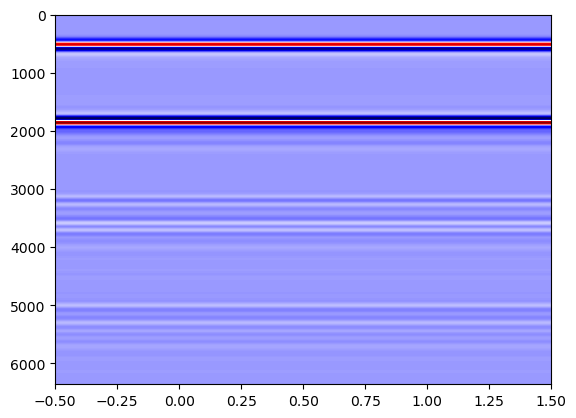

In [45]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

file_names = ['treetrunk_2d_merged.out']
Ez_list = []

# Load the data from each file
for file_name in file_names:
    with h5py.File(file_name, 'r') as f:
        Ez = f['rxs']['rx1']['Ez'][()]
        Ez_list.append(Ez)

with h5py.File('cir_src_only.out', 'r') as f0:
    Ez0 = f0['rxs']['rx1']['Ez'][()]

# src = Ez0[:,np.newaxis]
src = Ez0[:, np.newaxis]  # Add a new axis

Ez0 = np.repeat(src, 2, axis=1)

# Compute the differences relative to the first file
Ez_diff_list = [np.subtract(Ez, Ez0) for Ez in Ez_list]

Ez = np.concatenate(Ez_diff_list, axis=1)

plt.imshow(Ez, cmap='seismic', aspect='auto')
# plt.set_cmap('gray')



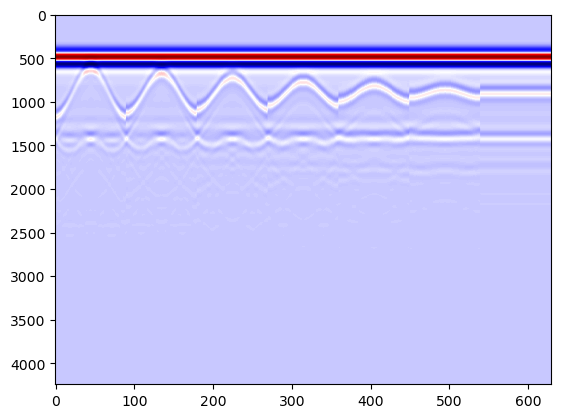

In [4]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

file_names =  ['treetrunk_2d_merged.out']
Ez_list = []

# Load the data from each file
for file_name in file_names:
    with h5py.File(file_name, 'r') as f:
        Ez = f['rxs']['rx1']['Ez'][()]
        Ez_list.append(Ez)

with h5py.File('cir_src_only.out', 'r') as f0:
    Ez0 = f0['rxs']['rx1']['Ez'][()]

# src = Ez0[:,np.newaxis]
src = Ez0[:, np.newaxis]  # Add a new axis

Ez0 = np.repeat(src, 90, axis=1)

# Compute the differences relative to the first file
Ez_diff_list = [np.subtract(Ez, Ez0) for Ez in Ez_list]

Ez = np.concatenate(Ez_diff_list, axis=1)

plt.imshow(Ez, cmap='seismic', aspect='auto')
# plt.set_cmap('gray')
